# Jeremy Kawahigashi
## Agglomerative Clustering: Independent Learning
### Dataset used is Wine Quality from UCI ML here
https://archive.ics.uci.edu/dataset/186/wine+quality_

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
y = wine_quality.data.targets

print(wine_quality.variables)

                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  Non

In [ ]:
# Combine the features and targets into one DataFrame for visualization purposes
data = pd.concat([X, y], axis=1)

In [ ]:
# Standardize the data to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
clusters = agg_clustering.fit_predict(X_scaled)

In [ ]:
# Add the cluster labels to the original dataframe
data['cluster'] = clusters

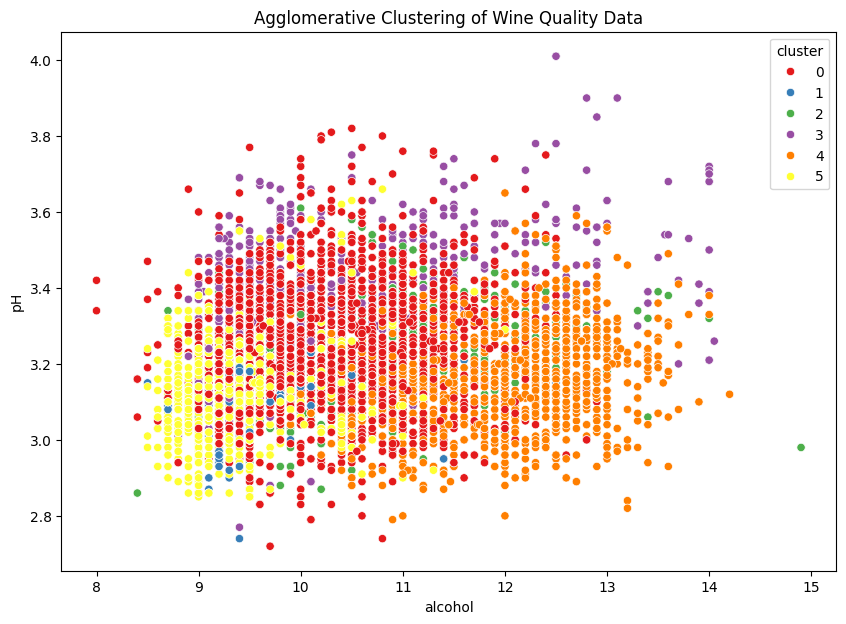

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='alcohol', y='pH', hue='cluster', data=data, palette='Set1')
plt.title('Agglomerative Clustering of Wine Quality Data')
plt.show()

In [ ]:
# Display the number of wines in each cluster
cluster_counts = data['cluster'].value_counts()
print(cluster_counts)

cluster
0    2321
4    1307
5    1128
3     937
2     673
1     131
Name: count, dtype: int64


The output shows the number of wiine samples that belog to each cluster after performing agglomerative clustering. Each cluster repesents samples that have similar physicochemical propertites regardless of red or white wine type.